In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as st
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
pd.set_option('display.max_columns',None)
df_train=pd.read_csv('../input/banking-dataset-marketing-targets/train.csv')

In [4]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
print('train shape: {}'.format(df_train.shape))

train shape: (31647, 18)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
df_train.drop(['ID','poutcome'],axis=1,inplace=True)

In [8]:
df_train.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

In [9]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Inferences:

* 1.Age can be assumed to be normally distributed as mean and median are almost equal.
* 2.For Balance and Duration (contact duration), mean > median which indicates that both are right skewed and high outliers are present.
* 3.Campaign (no. of contacts performed during this campaign), mean > median with not much difference hence it is right skewed but it can be said that contacts to customer while campaign are almost same as difference between mean and median is not much.

# EDA

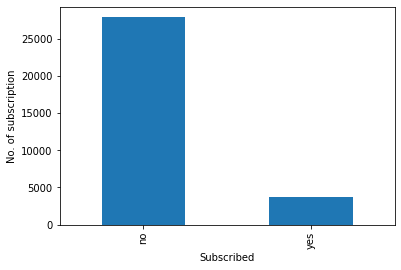

In [10]:
df_train['subscribed'].value_counts().plot(kind='bar')
plt.xlabel('Subscribed')
plt.ylabel('No. of subscription')
plt.show()

In [11]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Target variable is highly imbalanced , hence imbalanced data treatment is required.

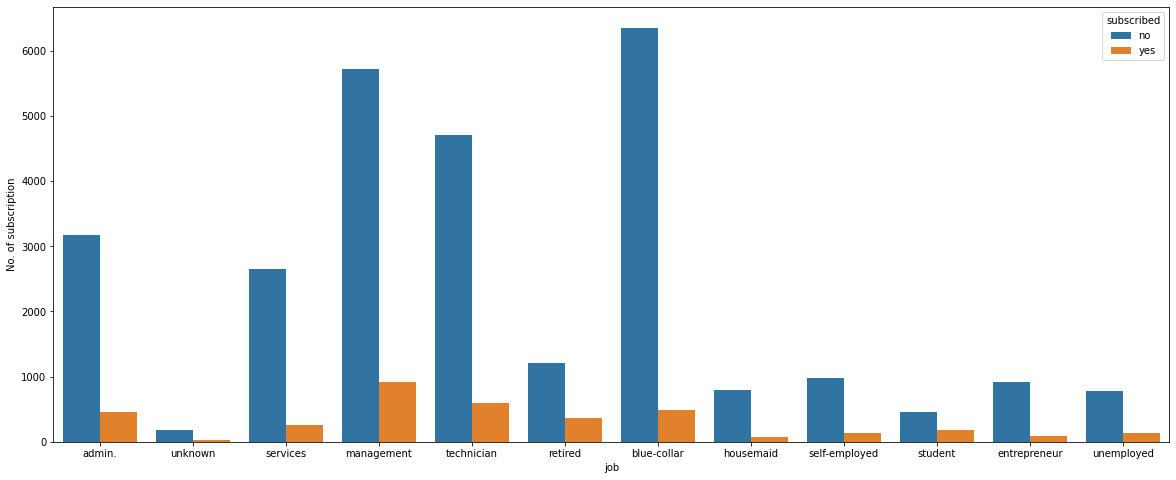

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_train,x='job',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

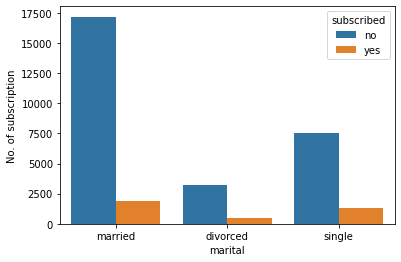

In [13]:
sns.countplot(data=df_train,x='marital',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

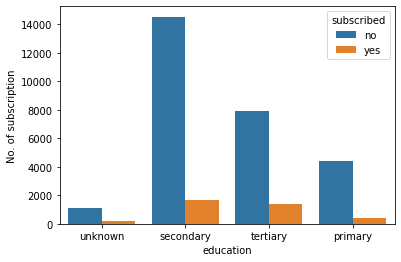

In [14]:
sns.countplot(data=df_train,x='education',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

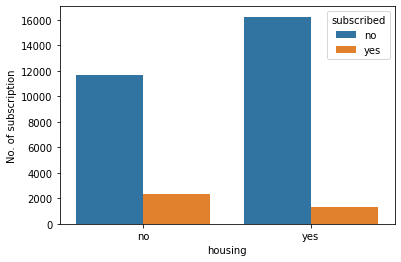

In [15]:
sns.countplot(data=df_train,x='housing',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

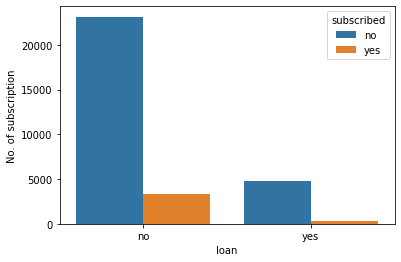

In [16]:
sns.countplot(data=df_train,x='loan',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

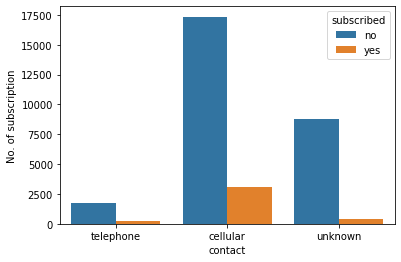

In [17]:
sns.countplot(data=df_train,x='contact',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

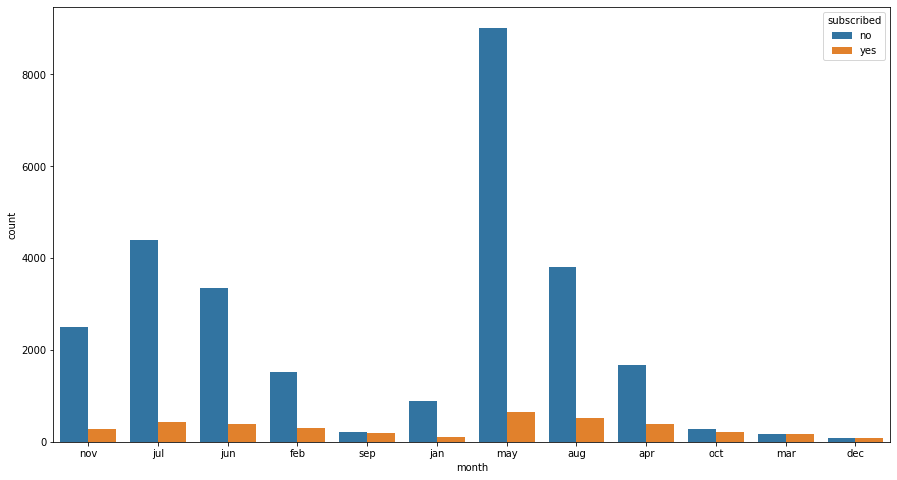

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,x='month',hue='subscribed')

From above exploratory data analysis, bank should target the following customer segment:
* Customer working in management, bluecollar and technical fields.
* Married customer are most probable of subscribing the product.
* Customer should have atleast secondary education.
* Customer possesing houseloan and personal loan are of less probablity to subscrib the product.
* The customers who are connected through cellular contact are of high probability for product subscription.
* Months that are most suitable to conduct a 2nd marketing campaign are from April to August with May having the most high chances of customers subcribing product. 

In [19]:
final_train = pd.get_dummies(data=df_train,columns=['job','marital','education','default','housing','loan','contact','month'])

In [20]:
final_train['subscribed']=final_train['subscribed'].replace('no',0)
final_train['subscribed']=final_train['subscribed'].replace('yes',1)

In [21]:
final_train.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,1933,19,44,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,31,3,20,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,27,891,18,240,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,57,3287,22,867,1,84,3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,119,4,380,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
final_train.shape

(31647, 48)

In [23]:
cor=final_train.corr()
sub_cor=abs(cor['subscribed'])
sig_features=sub_cor[sub_cor>0.05]
print(sig_features)
print(sig_features.count())

balance               0.050807
duration              0.389838
campaign              0.070607
pdays                 0.108290
previous              0.088081
subscribed            1.000000
job_blue-collar       0.074922
job_retired           0.080029
job_student           0.075230
marital_married       0.064724
marital_single        0.066253
education_tertiary    0.069641
housing_no            0.141092
housing_yes           0.141092
loan_no               0.072266
loan_yes              0.072266
contact_cellular      0.138214
contact_unknown       0.151719
month_apr             0.056877
month_dec             0.074849
month_mar             0.127090
month_may             0.103581
month_oct             0.127530
month_sep             0.124028
Name: subscribed, dtype: float64
24


Above features are highly correlated with target variable i.e subscribed and thus are the significant features.But we will still perform feature selection technique to find the most significant features.

# Feature Selection

In [24]:
X=final_train.drop('subscribed',axis=1)
y=final_train['subscribed']

In [25]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.720307,age
1,1.053585,balance
2,1.343329,day
3,1.014941,duration
4,1.112067,campaign
5,1.446020,pdays
6,1.236916,previous
7,inf,job_admin.
8,inf,job_blue-collar
9,inf,job_entrepreneur


In [26]:
x=X.drop(['age','job_admin.','marital_divorced','education_primary','default_no','loan_no','housing_no','contact_unknown','month_apr'],axis=1)
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif1["features"] = x.columns
vif1

,VIF Factor,features
0,1.256217,balance
1,5.383891,day
2,1.991590,duration
3,1.988939,campaign
4,1.675204,pdays
5,1.306229,previous
6,2.773669,job_blue-collar
7,1.298111,job_entrepreneur
8,1.247133,job_housemaid
9,3.578943,job_management


In [27]:

df= final_train.drop(['age','job_admin.','marital_divorced','education_primary','default_no','loan_no','housing_no','contact_unknown','month_apr'],axis=1)

In [28]:
df.shape

(31647, 39)

In [29]:
X=df.drop('subscribed',axis=1)
y=df['subscribed']

# Train-Test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Imbalanced data treatment :Over sampling minority class

In [31]:
Xytrain = pd.concat([X_train,y_train],axis=1)

print('before oversampling: ','\n', Xytrain['subscribed'].value_counts())
Xytrain0 = Xytrain[Xytrain['subscribed']==0]
Xytrain1 = Xytrain[Xytrain['subscribed']==1]

len0 = len(Xytrain0)
len1 = len(Xytrain1)

Xytrain1_os = Xytrain1.sample(len0,replace = True, random_state=3)
Xytrain_os = pd.concat([Xytrain0, Xytrain1_os],axis=0)

print('after undersampling: ','\n',Xytrain_os['subscribed'].value_counts())

y_train_os = Xytrain_os['subscribed']
X_train_os = Xytrain_os.drop('subscribed',axis=1)

before oversampling:  
 0    19554
1     2598
Name: subscribed, dtype: int64
after undersampling:  
 1    19554
0    19554
Name: subscribed, dtype: int64


# Standardizing data

In [32]:
ss = StandardScaler()

Xtrains = ss.fit_transform(X_train_os)
Xtests = ss.transform(X_test)

In [33]:
def model_eval(algo, Xtrains, y_train_os, Xtests, y_test):
    algo.fit(Xtrains,y_train_os)
    ytrain_pred = algo.predict(Xtrains)
    ytrain_prob = algo.predict_proba(Xtrains)[:,1]

    print('Overall accuracy - train:' , accuracy_score(y_train_os, ytrain_pred))
    print('Confusion matrix - train: ','\n',confusion_matrix(y_train_os,ytrain_pred))
    print('AUC - train', roc_auc_score(y_train_os,ytrain_prob))
    print('\n')
    print('Classification report - train: ','\n',classification_report(y_train_os,ytrain_pred))

    ytest_pred = algo.predict(Xtests)
    ytest_prob = algo.predict_proba(Xtests)[:,1]

    print('\n')
    print('Overall accuracy - test:' , accuracy_score(y_test, ytest_pred))
    print('Confusion matrix - test: ','\n',confusion_matrix(y_test,ytest_pred))
    print('AUC - test', roc_auc_score(y_test,ytest_prob))
    print('Classification report - test: ','\n',classification_report(y_test,ytest_pred))

    fpr,tpr,thresholds = roc_curve(y_test,ytest_prob)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

# Decision Tree Classifier

Overall accuracy - train: 0.8076096962258361
Confusion matrix - train:  
 [[15101  4453]
 [ 3071 16483]]
AUC - train 0.8735284179956196


Classification report - train:  
               precision    recall  f1-score   support

           0       0.83      0.77      0.80     19554
           1       0.79      0.84      0.81     19554

    accuracy                           0.81     39108
   macro avg       0.81      0.81      0.81     39108
weighted avg       0.81      0.81      0.81     39108



Overall accuracy - test: 0.7843075302790943
Confusion matrix - test:  
 [[6518 1860]
 [ 188  929]]
AUC - test 0.8672163399345132
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.78      0.86      8378
           1       0.33      0.83      0.48      1117

    accuracy                           0.78      9495
   macro avg       0.65      0.80      0.67      9495
weighted avg       0.90      0.78      0.82      9495



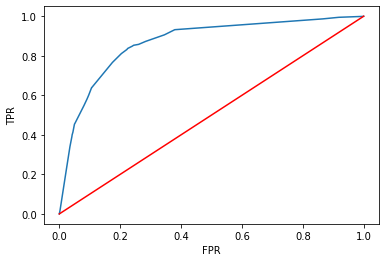

In [34]:
dt=DecisionTreeClassifier(max_depth = 5, criterion = 'gini',random_state=3)
model_eval(dt, Xtrains, y_train_os, Xtests, y_test)

#  Random Forest Classifier

Overall accuracy - train: 0.8270430602434284
Confusion matrix - train:  
 [[15248  4306]
 [ 2458 17096]]
AUC - train 0.9020374001164917


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.78      0.82     19554
           1       0.80      0.87      0.83     19554

    accuracy                           0.83     39108
   macro avg       0.83      0.83      0.83     39108
weighted avg       0.83      0.83      0.83     39108



Overall accuracy - test: 0.7867298578199052
Confusion matrix - test:  
 [[6496 1882]
 [ 143  974]]
AUC - test 0.8936532415438566
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      8378
           1       0.34      0.87      0.49      1117

    accuracy                           0.79      9495
   macro avg       0.66      0.82      0.68      9495
weighted avg       0.90      0.79      0.82      9495



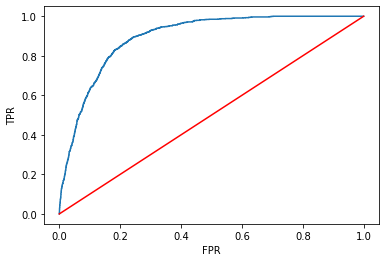

In [35]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,random_state=3)
model_eval(rf, Xtrains, y_train_os, Xtests, y_test)

# Logistic Regression

Overall accuracy - train: 0.8216477447069653
Confusion matrix - train:  
 [[16197  3357]
 [ 3618 15936]]
AUC - train 0.8970704242712102


Classification report - train:  
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     19554
           1       0.83      0.81      0.82     19554

    accuracy                           0.82     39108
   macro avg       0.82      0.82      0.82     39108
weighted avg       0.82      0.82      0.82     39108



Overall accuracy - test: 0.8256977356503423
Confusion matrix - test:  
 [[6923 1455]
 [ 200  917]]
AUC - test 0.9013603646674059
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      8378
           1       0.39      0.82      0.53      1117

    accuracy                           0.83      9495
   macro avg       0.68      0.82      0.71      9495
weighted avg       0.90      0.83      0.85      9495



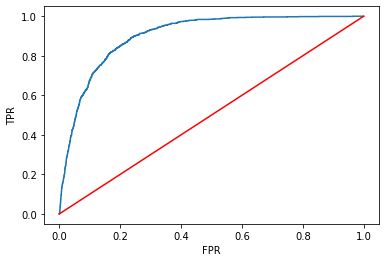

In [36]:
lr=LogisticRegression(solver='liblinear', fit_intercept=True,random_state=3)
model_eval(lr, Xtrains, y_train_os, Xtests, y_test)

# Boosting : Adaboost

Overall accuracy - train: 0.8289096859977498
Confusion matrix - train:  
 [[16295  3259]
 [ 3432 16122]]
AUC - train 0.9052807048966527


Classification report - train:  
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     19554
           1       0.83      0.82      0.83     19554

    accuracy                           0.83     39108
   macro avg       0.83      0.83      0.83     39108
weighted avg       0.83      0.83      0.83     39108



Overall accuracy - test: 0.8326487625065824
Confusion matrix - test:  
 [[6979 1399]
 [ 190  927]]
AUC - test 0.9059856002622719
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      8378
           1       0.40      0.83      0.54      1117

    accuracy                           0.83      9495
   macro avg       0.69      0.83      0.72      9495
weighted avg       0.91      0.83      0.86      9495



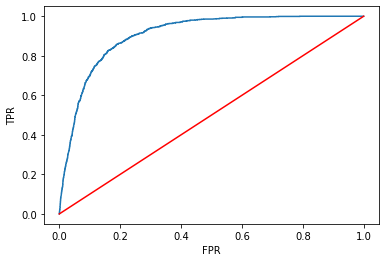

In [37]:
ada = AdaBoostClassifier(random_state = 3)
model_eval(ada, Xtrains, y_train_os, Xtests, y_test)

# Naive Bayes Classifier: Gaussian

Overall accuracy - train: 0.6849238007568784
Confusion matrix - train:  
 [[17371  2183]
 [10139  9415]]
AUC - train 0.7954112243063267


Classification report - train:  
               precision    recall  f1-score   support

           0       0.63      0.89      0.74     19554
           1       0.81      0.48      0.60     19554

    accuracy                           0.68     39108
   macro avg       0.72      0.68      0.67     39108
weighted avg       0.72      0.68      0.67     39108



Overall accuracy - test: 0.8403370194839389
Confusion matrix - test:  
 [[7448  930]
 [ 586  531]]
AUC - test 0.8007705733971374
Classification report - test:  
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      8378
           1       0.36      0.48      0.41      1117

    accuracy                           0.84      9495
   macro avg       0.65      0.68      0.66      9495
weighted avg       0.86      0.84      0.85      9495



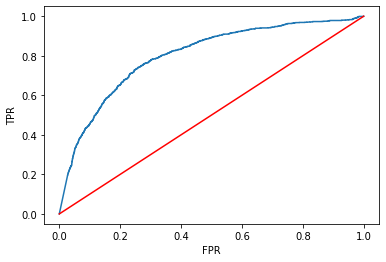

In [38]:
clf = GaussianNB()
model_eval(clf, Xtrains, y_train_os, Xtests, y_test)

# Conclusion

* Through EDA we get to know the customer segment target for cross selling of fixed deposit (bank product).
* Feature selection technique provides significant features to identify the target customers.
* Applied different classification algorithms to check which algorithm will give the best accurate results with the significant features.